# CODE FILE 01c - Exploratory Analysis Pt. 2
## Visualizing Data Relationships
#### Given the cleaned Pokemon TRAINING dataset from Exploratory Analysis Pt. 1, plot explanatory variables against the response (base_egg_steps) to visualize relationships between them. Perform all necessary exploratory analyses.
___

### STEP 1: Importing data and libraries

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from IPython.display import display

Viewing the data:

In [42]:
df = pd.read_csv("pokemon_cleaned_trainingset.csv")

pd.options.display.max_columns = None
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 57 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          264 non-null    object 
 1   against_bug        264 non-null    float64
 2   against_dark       264 non-null    float64
 3   against_dragon     264 non-null    float64
 4   against_electric   264 non-null    float64
 5   against_fairy      264 non-null    float64
 6   against_fighting   264 non-null    float64
 7   against_fire       264 non-null    float64
 8   against_flying     264 non-null    float64
 9   against_ghost      264 non-null    float64
 10  against_grass      264 non-null    float64
 11  against_ground     264 non-null    float64
 12  against_ice        264 non-null    float64
 13  against_normal     264 non-null    float64
 14  against_poison     264 non-null    float64
 15  against_psychic    264 non-null    float64
 16  against_rock       264 non

In [43]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_fire_type,is_water_type,is_grass_type,is_electric_type,is_ground_type,is_bug_type,is_normal_type,is_ice_type,is_flying_type,is_poison_type,is_fighting_type,is_rock_type,is_steel_type,is_fairy_type,is_dark_type,is_ghost_type,is_dragon_type,is_psychic_type,pure_type,base_egg_steps
0,"['Rough Skin', 'Speed Boost']",2.0,0.5,1.0,2.0,2.0,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.0,1.0,0.5,0.5,90,<70,305,225.0,Savage Pokémon,20,>=1.25M,0.8,45,Kibanhaキバニア,Carvanha,50,318,65,20,65,20.8,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5120
1,"['Shed Skin', 'Overcoat']",1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,29,>=70,224,120.0,Bagworm Pokémon,45,1M-1.25M,0.2,40,Minomucchiミノムッチ,Burmy,50,412,29,45,36,3.4,4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,<=3840
2,['Steelworker'],1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.5,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0.5,131,>=70,517,25.0,Sea Creeper Pokémon,100,1M-1.25M,3.9,70,Dadarinダダリン,Dhelmise,agender,781,86,90,40,210.0,7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,6400
3,"['Clear Body', 'Liquid Ooze', 'Rain Dish']",0.5,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,1.0,2.0,0.5,1.0,0.5,2.0,1.0,0.5,0.5,40,>=70,335,190.0,Jellyfish Pokémon,35,>=1.25M,0.9,40,Menokurageメノクラゲ,Tentacool,50,72,50,100,70,45.5,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,5120
4,"['Snow Cloak', 'Slush Rush', 'Rattled']",1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0,70,>=70,305,120.0,Chill Pokémon,40,1M-1.25M,0.5,55,Kumasyunクマシュン,Cubchoo,50,613,60,40,40,8.5,5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,5120


### STEP 2: Prepping data for visualizations by removing certain variables

In [10]:
# Remove the indexing that was added by saving the trainingset as a csv with pandas:
# df = df.drop(columns=['Unnamed: 0'])

# Remove Japanese name, since we do not expect that variable to have any predictive power 
# and we can identify a Pokemon species using English name
df = df.drop(columns = ['japanese_name'])

# Drop ability (string values that would require significant thought to encode, and which may not have much predictive merit)
df = df.drop(columns = ['abilities'])

df.head()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fighting,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_fire_type,is_water_type,is_grass_type,is_electric_type,is_ground_type,is_bug_type,is_normal_type,is_ice_type,is_flying_type,is_poison_type,is_fighting_type,is_rock_type,is_steel_type,is_fairy_type,is_dark_type,is_ghost_type,is_dragon_type,is_psychic_type,pure_type,base_egg_steps
0,2.0,0.5,1.0,2.0,2.0,2.0,0.5,1.0,0.5,2.0,1.0,0.5,1.0,1.0,0.0,1.0,0.5,0.5,90,<70,305,225.0,Savage Pokémon,20,>=1.25M,0.8,45,Carvanha,50,318,65,20,65,20.8,3,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,5120
1,1.0,1.0,1.0,1.0,1.0,0.5,2.0,2.0,1.0,0.5,0.5,1.0,1.0,1.0,1.0,2.0,1.0,1.0,29,>=70,224,120.0,Bagworm Pokémon,45,1M-1.25M,0.2,40,Burmy,50,412,29,45,36,3.4,4,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,<=3840
2,1.0,2.0,1.0,0.5,1.0,0.0,2.0,2.0,2.0,0.5,0.5,2.0,0.0,1.0,1.0,1.0,1.0,0.5,131,>=70,517,25.0,Sea Creeper Pokémon,100,1M-1.25M,3.9,70,Dhelmise,agender,781,86,90,40,210.0,7,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,6400
3,0.5,1.0,1.0,2.0,0.5,0.5,0.5,1.0,1.0,1.0,2.0,0.5,1.0,0.5,2.0,1.0,0.5,0.5,40,>=70,335,190.0,Jellyfish Pokémon,35,>=1.25M,0.9,40,Tentacool,50,72,50,100,70,45.5,1,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,5120
4,1.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,2.0,2.0,1.0,70,>=70,305,120.0,Chill Pokémon,40,1M-1.25M,0.5,55,Cubchoo,50,613,60,40,40,8.5,5,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,5120


Viewing response variable distribution:

In [11]:
df['base_egg_steps'].value_counts()

5120      157
<=3840     59
>=7680     25
6400       23
Name: base_egg_steps, dtype: int64

Making a smaller dataframe that first excludes Types and against_? features (i.e. damage taken against an attack of a particular type), for simplicity to start with:

In [12]:
smaller_df = df.drop(df.loc[:, 'is_fire_type':'is_psychic_type'].columns, axis = 1)
smaller_df = smaller_df.drop(smaller_df.loc[:, 'against_bug':'against_water'].columns, axis = 1)

In [13]:
smaller_df.columns

Index(['attack', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack', 'sp_defense',
       'speed', 'weight_kg', 'generation', 'pure_type', 'base_egg_steps'],
      dtype='object')

In [14]:
len(smaller_df.columns)

19

## Visualizing Data
### STEP 3.1: Analyzing overall corrrelation among features from our 'smaller dataframe':

<AxesSubplot:>

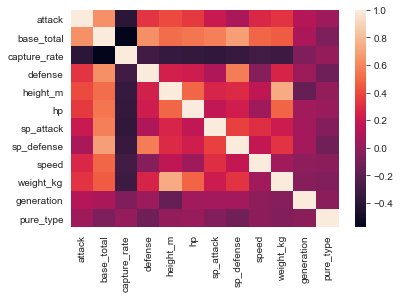

In [15]:
selected_numeric_features = smaller_df.drop(['pokedex_number'], axis = 1)

sns.heatmap(selected_numeric_features.corr())
## Optional Remarks: Besides capture_rate, height_m seems strongly negatively correlated with generation, and
## sp_defense seems strongly positively correlated with base_total.

### STEP 3.2: Bar charts from our original dataframe, to show relationships between Response and categorical features
Plots between base_egg_steps and (intuitively) critical categorical features:

In [16]:
def compare_categorical(feature):
    #show counts
    print(pd.crosstab(df["base_egg_steps"], df[feature]))
    print('\n')
    
    #show distributions across response for each feature category
    print(pd.crosstab(df["base_egg_steps"], df[feature], normalize='columns'))
    print("\n")
    
    # do a histplot of response distribution for each feature category
    plt.figure()
    sns.histplot(data=df, x='base_egg_steps', hue=feature, multiple='dodge', stat = 'probability', common_norm = False)
    plt.show()

    #show distributions across feature for each response category
    print(pd.crosstab(df["base_egg_steps"], df[feature], normalize='index'))
    print("\n")
    
    # do a histplot of feature distribution for each response category
    plt.figure()
    sns.histplot(data=df, x=feature, hue='base_egg_steps', multiple='dodge', stat = 'probability', common_norm = False)
    plt.show()
        

base_happiness  <70  >=70
base_egg_steps           
5120              7   150
6400              4    19
<=3840            1    58
>=7680            2    23


base_happiness       <70   >=70
base_egg_steps                 
5120            0.500000  0.600
6400            0.285714  0.076
<=3840          0.071429  0.232
>=7680          0.142857  0.092




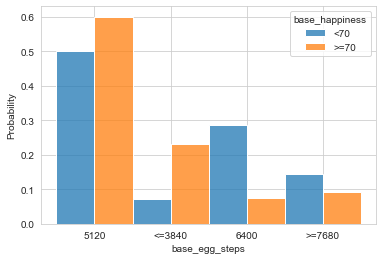

base_happiness       <70      >=70
base_egg_steps                    
5120            0.044586  0.955414
6400            0.173913  0.826087
<=3840          0.016949  0.983051
>=7680          0.080000  0.920000




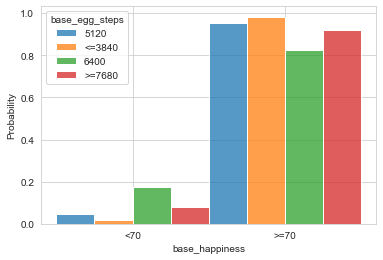

experience_growth  1M-1.25M  <1M  >=1.25M
base_egg_steps                           
5120                    125   12       20
6400                     12    6        5
<=3840                   40   13        6
>=7680                    8    4       13


experience_growth  1M-1.25M       <1M   >=1.25M
base_egg_steps                                 
5120               0.675676  0.342857  0.454545
6400               0.064865  0.171429  0.113636
<=3840             0.216216  0.371429  0.136364
>=7680             0.043243  0.114286  0.295455




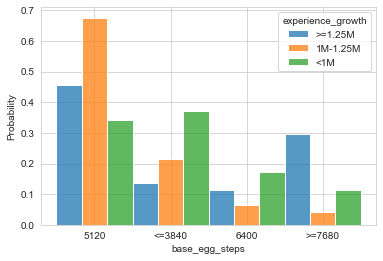

experience_growth  1M-1.25M       <1M   >=1.25M
base_egg_steps                                 
5120               0.796178  0.076433  0.127389
6400               0.521739  0.260870  0.217391
<=3840             0.677966  0.220339  0.101695
>=7680             0.320000  0.160000  0.520000




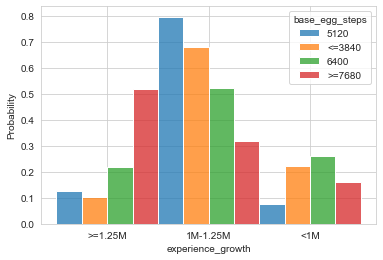

percentage_male   50  <50  >50  agender
base_egg_steps                         
5120             110   13   28        6
6400              13    0    4        6
<=3840            48    5    6        0
>=7680            12    0   12        1


percentage_male        50       <50   >50   agender
base_egg_steps                                     
5120             0.601093  0.722222  0.56  0.461538
6400             0.071038  0.000000  0.08  0.461538
<=3840           0.262295  0.277778  0.12  0.000000
>=7680           0.065574  0.000000  0.24  0.076923




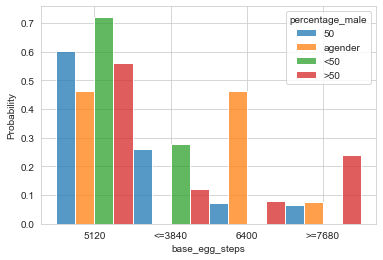

percentage_male        50       <50       >50   agender
base_egg_steps                                         
5120             0.700637  0.082803  0.178344  0.038217
6400             0.565217  0.000000  0.173913  0.260870
<=3840           0.813559  0.084746  0.101695  0.000000
>=7680           0.480000  0.000000  0.480000  0.040000




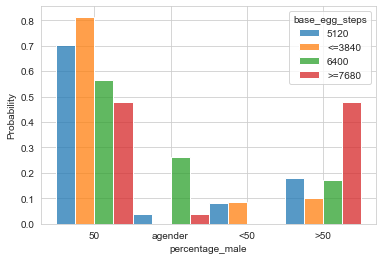

In [17]:
features_to_compare = ["base_happiness", "experience_growth", "percentage_male"]
for feature in features_to_compare:
    compare_categorical(feature)

### STEP 3.3: Boxplots showing relationships between Response variable and select numerical features
#### First plotting the different Pokemon stats features against base_egg_steps :
Pokemon stats are: 'attack', 'defense', 'hp', 'sp_attack', 'sp_defense', and 'speed'. <br> <br>
First, 'attack' against base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='attack'>

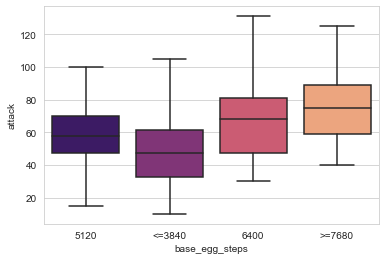

In [18]:
sns.boxplot(y='attack', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
                 showfliers=False)

Now, 'defense' against base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='defense'>

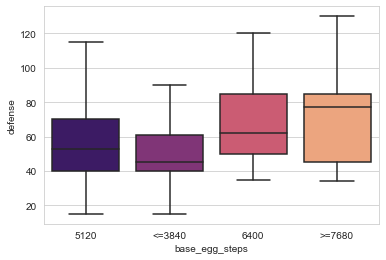

In [19]:
sns.boxplot(y='defense', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma", 
            showfliers=False)

Now, 'hp' against base_egg_steps :

<AxesSubplot:xlabel='base_egg_steps', ylabel='hp'>

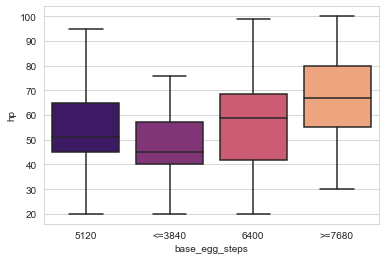

In [20]:
sns.boxplot(y='hp', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
            showfliers=False)

'sp_attack' against base_egg_steps :

<AxesSubplot:xlabel='base_egg_steps', ylabel='sp_attack'>

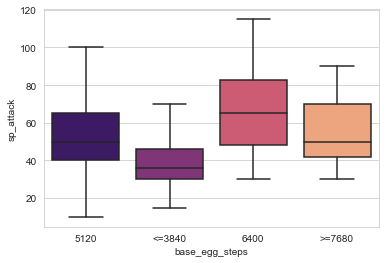

In [21]:
sns.boxplot(y='sp_attack', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
                 #hue='percentage_male', 
            showfliers=False)

'sp_defense' against base_egg_steps :

<AxesSubplot:xlabel='base_egg_steps', ylabel='sp_defense'>

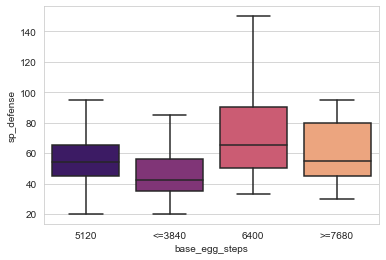

In [22]:
sns.boxplot(y='sp_defense', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
                 #hue='percentage_male', 
            showfliers=False)

'speed' against base_egg_steps :

<AxesSubplot:xlabel='base_egg_steps', ylabel='speed'>

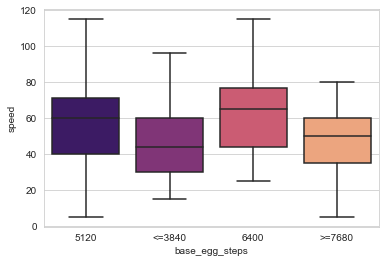

In [23]:
sns.boxplot(y='speed', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
                 #hue='percentage_male', 
            showfliers=False)

'base_total' against base_egg_steps :

<AxesSubplot:xlabel='base_egg_steps', ylabel='base_total'>

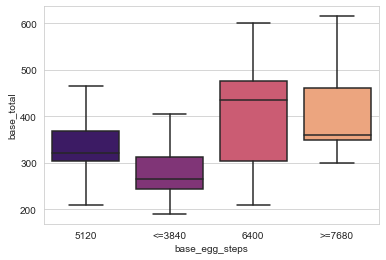

In [24]:
sns.boxplot(y='base_total', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="magma",
                 #hue='percentage_male', 
            showfliers=False)

#### And now plotting the remaining numerical features against base_egg_steps :
Other numerical features are: 'weight_kg','height_m','base_total', and 'capture_rate'. <br> <br>
First, 'weight_kg' against base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='weight_kg'>

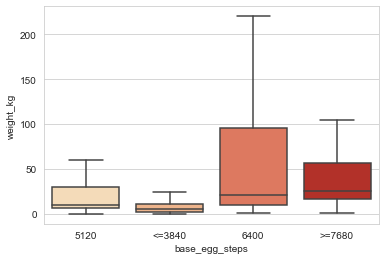

In [25]:
sns.boxplot(y='weight_kg', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="OrRd",
                 #hue='percentage_male', 
            showfliers=False)

height_m against base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='height_m'>

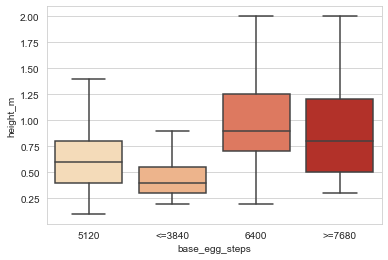

In [26]:
sns.boxplot(y='height_m', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="OrRd",
                 #hue='percentage_male', 
            showfliers=False)

capture_rate against base_egg_steps:

<AxesSubplot:xlabel='base_egg_steps', ylabel='capture_rate'>

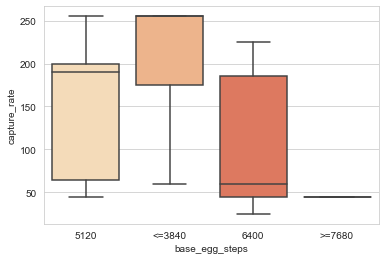

In [27]:
sns.boxplot(y='capture_rate', x='base_egg_steps', 
                 data=smaller_df, 
                 palette="OrRd", showfliers=False)

### STEP 3.4: Bar plots showing relationships between Response variable and against_? features

#### Below are only the barplots that do show some sort of noticeable trend.

In [28]:
ALL_TYPES = ['fire', 'water', 'grass', 'electric', 
             'ground', 'bug', 'normal', 'ice', 'flying', 
             'poison', 'fighting', 'rock', 'steel', 'fairy',
             'dark', 'ghost', 'dragon', 'psychic']

In [29]:
against_features = []
for pokemon_type in ALL_TYPES:
    against_features.append('against_' + pokemon_type)

Relationship with 'against_dragon' : 

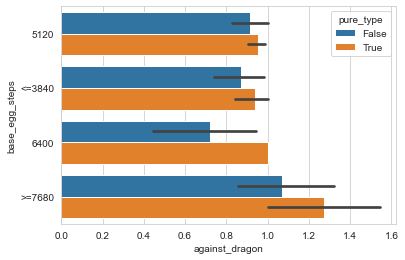

against_dragon  0.0  0.5  1.0  2.0
base_egg_steps                    
5120              9    6  140    2
6400              2    1   20    0
<=3840            5    1   53    0
>=7680            0    2   18    5


against_dragon     0.0  0.5       1.0       2.0
base_egg_steps                                 
5120            0.5625  0.6  0.606061  0.285714
6400            0.1250  0.1  0.086580  0.000000
<=3840          0.3125  0.1  0.229437  0.000000
>=7680          0.0000  0.2  0.077922  0.714286




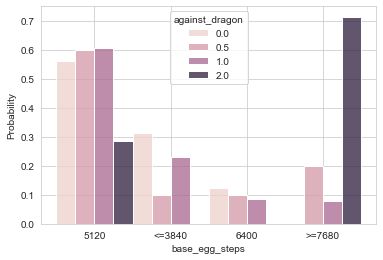

against_dragon       0.0       0.5       1.0       2.0
base_egg_steps                                        
5120            0.057325  0.038217  0.891720  0.012739
6400            0.086957  0.043478  0.869565  0.000000
<=3840          0.084746  0.016949  0.898305  0.000000
>=7680          0.000000  0.080000  0.720000  0.200000




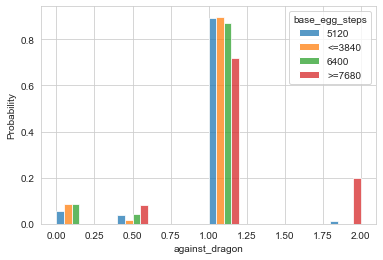

In [30]:
sns.barplot(x = "against_dragon", y = "base_egg_steps", hue = "pure_type", data = df)
plt.show()
compare_categorical("against_dragon")

Relationship with 'against_fire' : 

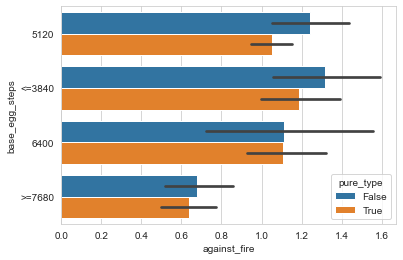

against_fire    0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               1    44    73    37     2
6400               0     5    13     5     0
<=3840             0    11    30    17     1
>=7680             4    11    10     0     0


against_fire    0.25      0.50      1.00      2.00      4.00
base_egg_steps                                              
5120             0.2  0.619718  0.579365  0.627119  0.666667
6400             0.0  0.070423  0.103175  0.084746  0.000000
<=3840           0.0  0.154930  0.238095  0.288136  0.333333
>=7680           0.8  0.154930  0.079365  0.000000  0.000000




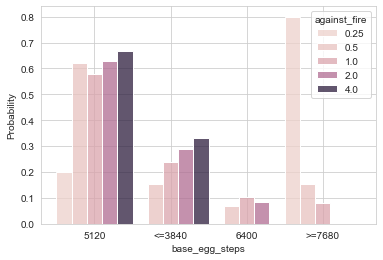

against_fire        0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.006369  0.280255  0.464968  0.235669  0.012739
6400            0.000000  0.217391  0.565217  0.217391  0.000000
<=3840          0.000000  0.186441  0.508475  0.288136  0.016949
>=7680          0.160000  0.440000  0.400000  0.000000  0.000000




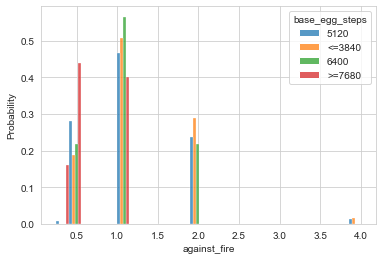

In [31]:
sns.barplot(x = "against_fire", y = "base_egg_steps", hue = "pure_type", data = df)
plt.show()
compare_categorical("against_fire")

Relationship with 'against_?' where refers to a Pokemon type, for ALL Pokemon types! :

against_fire    0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               1    44    73    37     2
6400               0     5    13     5     0
<=3840             0    11    30    17     1
>=7680             4    11    10     0     0


against_fire    0.25      0.50      1.00      2.00      4.00
base_egg_steps                                              
5120             0.2  0.619718  0.579365  0.627119  0.666667
6400             0.0  0.070423  0.103175  0.084746  0.000000
<=3840           0.0  0.154930  0.238095  0.288136  0.333333
>=7680           0.8  0.154930  0.079365  0.000000  0.000000




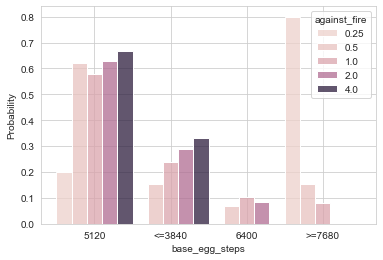

against_fire        0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.006369  0.280255  0.464968  0.235669  0.012739
6400            0.000000  0.217391  0.565217  0.217391  0.000000
<=3840          0.000000  0.186441  0.508475  0.288136  0.016949
>=7680          0.160000  0.440000  0.400000  0.000000  0.000000




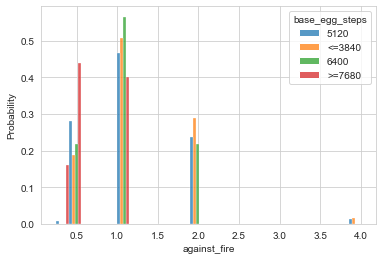

against_water   0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               0    51    79    25     2
6400               0     3    15     5     0
<=3840             1    13    39     5     1
>=7680             0     8     9     8     0


against_water   0.25      0.50      1.00      2.00      4.00
base_egg_steps                                              
5120             0.0  0.680000  0.556338  0.581395  0.666667
6400             0.0  0.040000  0.105634  0.116279  0.000000
<=3840           1.0  0.173333  0.274648  0.116279  0.333333
>=7680           0.0  0.106667  0.063380  0.186047  0.000000




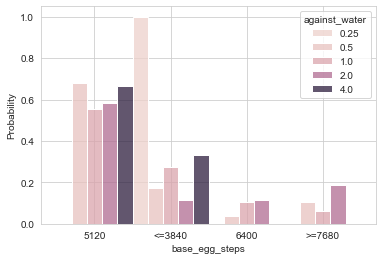

against_water       0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.000000  0.324841  0.503185  0.159236  0.012739
6400            0.000000  0.130435  0.652174  0.217391  0.000000
<=3840          0.016949  0.220339  0.661017  0.084746  0.016949
>=7680          0.000000  0.320000  0.360000  0.320000  0.000000




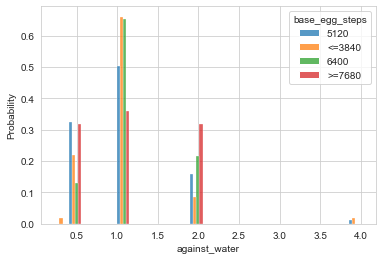

against_grass   0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120              11    54    60    28     4
6400               2     3    14     4     0
<=3840             7    19    22    10     1
>=7680             1     4     9     8     3


against_grass       0.25    0.50      1.00  2.00   4.00
base_egg_steps                                         
5120            0.523810  0.6750  0.571429  0.56  0.500
6400            0.095238  0.0375  0.133333  0.08  0.000
<=3840          0.333333  0.2375  0.209524  0.20  0.125
>=7680          0.047619  0.0500  0.085714  0.16  0.375




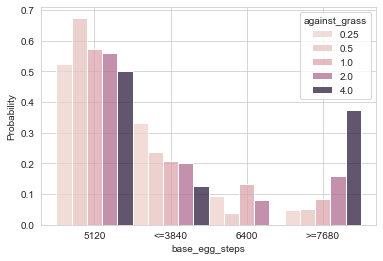

against_grass       0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.070064  0.343949  0.382166  0.178344  0.025478
6400            0.086957  0.130435  0.608696  0.173913  0.000000
<=3840          0.118644  0.322034  0.372881  0.169492  0.016949
>=7680          0.040000  0.160000  0.360000  0.320000  0.120000




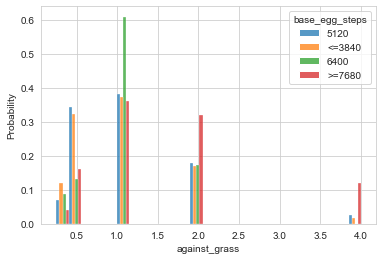

against_electric  0.0  0.5  1.0  2.0  4.0
base_egg_steps                           
5120               11   36   79   31    0
6400                1    1   19    1    1
<=3840              3    6   32   18    0
>=7680              2    5    7   11    0


against_electric       0.0       0.5       1.0       2.0  4.0
base_egg_steps                                               
5120              0.647059  0.750000  0.576642  0.508197  0.0
6400              0.058824  0.020833  0.138686  0.016393  1.0
<=3840            0.176471  0.125000  0.233577  0.295082  0.0
>=7680            0.117647  0.104167  0.051095  0.180328  0.0




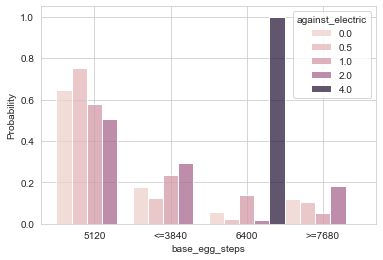

against_electric       0.0       0.5       1.0       2.0       4.0
base_egg_steps                                                    
5120              0.070064  0.229299  0.503185  0.197452  0.000000
6400              0.043478  0.043478  0.826087  0.043478  0.043478
<=3840            0.050847  0.101695  0.542373  0.305085  0.000000
>=7680            0.080000  0.200000  0.280000  0.440000  0.000000




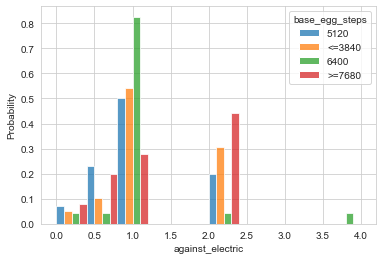

against_ground  0.00  0.25  0.50  1.00  2.00  4.00
base_egg_steps                                    
5120               9     0    22    82    42     2
6400               3     0     2    14     4     0
<=3840            10     1    14    26     7     1
>=7680             3     0     0    14     6     2


against_ground  0.00  0.25      0.50      1.00      2.00  4.00
base_egg_steps                                                
5120            0.36   0.0  0.578947  0.602941  0.711864   0.4
6400            0.12   0.0  0.052632  0.102941  0.067797   0.0
<=3840          0.40   1.0  0.368421  0.191176  0.118644   0.2
>=7680          0.12   0.0  0.000000  0.102941  0.101695   0.4




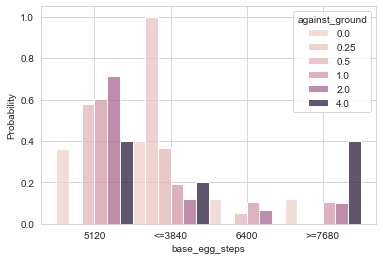

against_ground      0.00      0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                            
5120            0.057325  0.000000  0.140127  0.522293  0.267516  0.012739
6400            0.130435  0.000000  0.086957  0.608696  0.173913  0.000000
<=3840          0.169492  0.016949  0.237288  0.440678  0.118644  0.016949
>=7680          0.120000  0.000000  0.000000  0.560000  0.240000  0.080000




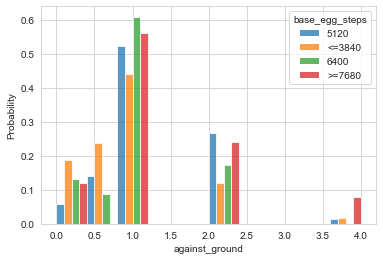

against_bug     0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               4    45    77    29     2
6400               1    12     5     5     0
<=3840             2    19    31     7     0
>=7680             1     5    18     1     0


against_bug      0.25      0.50      1.00      2.00  4.00
base_egg_steps                                           
5120            0.500  0.555556  0.587786  0.690476   1.0
6400            0.125  0.148148  0.038168  0.119048   0.0
<=3840          0.250  0.234568  0.236641  0.166667   0.0
>=7680          0.125  0.061728  0.137405  0.023810   0.0




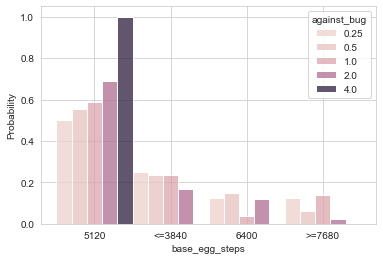

against_bug         0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.025478  0.286624  0.490446  0.184713  0.012739
6400            0.043478  0.521739  0.217391  0.217391  0.000000
<=3840          0.033898  0.322034  0.525424  0.118644  0.000000
>=7680          0.040000  0.200000  0.720000  0.040000  0.000000




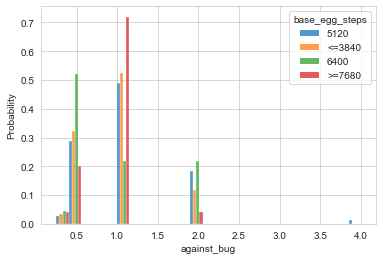

against_normal  0.00  0.25  0.50  1.00
base_egg_steps                        
5120               4     0    13   140
6400               6     0     4    13
<=3840             1     0     4    54
>=7680             1     2     9    13


against_normal      0.00  0.25      0.50      1.00
base_egg_steps                                    
5120            0.333333   0.0  0.433333  0.636364
6400            0.500000   0.0  0.133333  0.059091
<=3840          0.083333   0.0  0.133333  0.245455
>=7680          0.083333   1.0  0.300000  0.059091




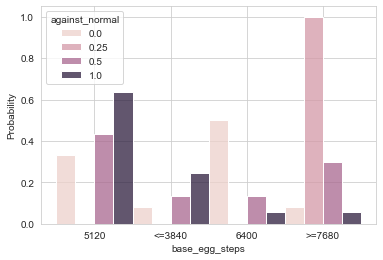

against_normal      0.00  0.25      0.50      1.00
base_egg_steps                                    
5120            0.025478  0.00  0.082803  0.891720
6400            0.260870  0.00  0.173913  0.565217
<=3840          0.016949  0.00  0.067797  0.915254
>=7680          0.040000  0.08  0.360000  0.520000




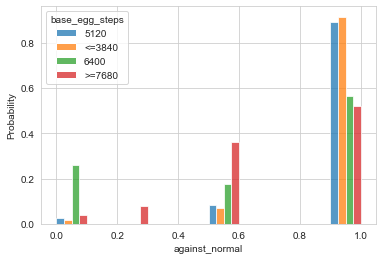

against_ice     0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               1    46    70    39     1
6400               0     2    18     2     1
<=3840             0    11    32    15     1
>=7680             1    11     3     9     1


against_ice     0.25      0.50      1.00      2.00  4.00
base_egg_steps                                          
5120             0.5  0.657143  0.569106  0.600000  0.25
6400             0.0  0.028571  0.146341  0.030769  0.25
<=3840           0.0  0.157143  0.260163  0.230769  0.25
>=7680           0.5  0.157143  0.024390  0.138462  0.25




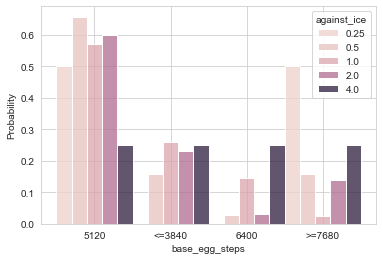

against_ice         0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.006369  0.292994  0.445860  0.248408  0.006369
6400            0.000000  0.086957  0.782609  0.086957  0.043478
<=3840          0.000000  0.186441  0.542373  0.254237  0.016949
>=7680          0.040000  0.440000  0.120000  0.360000  0.040000




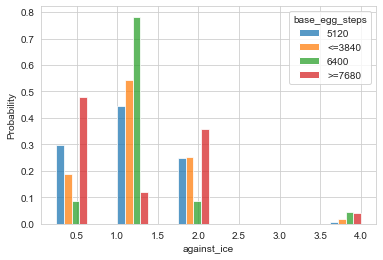

against_flying  0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               1    19   101    36     0
6400               0     4    12     7     0
<=3840             1     5    30    22     1
>=7680             2     8    14     1     0


against_flying  0.25      0.50      1.00      2.00  4.00
base_egg_steps                                          
5120            0.25  0.527778  0.643312  0.545455   0.0
6400            0.00  0.111111  0.076433  0.106061   0.0
<=3840          0.25  0.138889  0.191083  0.333333   1.0
>=7680          0.50  0.222222  0.089172  0.015152   0.0




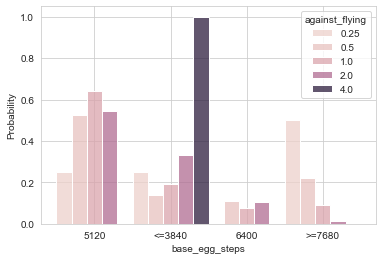

against_flying      0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.006369  0.121019  0.643312  0.229299  0.000000
6400            0.000000  0.173913  0.521739  0.304348  0.000000
<=3840          0.016949  0.084746  0.508475  0.372881  0.016949
>=7680          0.080000  0.320000  0.560000  0.040000  0.000000




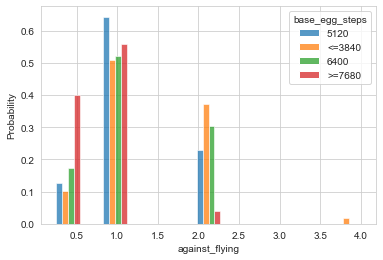

against_poison  0.00  0.25  0.50  1.00  2.00  4.00
base_egg_steps                                    
5120               7     1    29    97    22     1
6400               1     1     6    13     2     0
<=3840             1     2     7    39    10     0
>=7680             2     0    11    12     0     0


against_poison      0.00  0.25      0.50      1.00      2.00  4.00
base_egg_steps                                                    
5120            0.636364  0.25  0.547170  0.602484  0.647059   1.0
6400            0.090909  0.25  0.113208  0.080745  0.058824   0.0
<=3840          0.090909  0.50  0.132075  0.242236  0.294118   0.0
>=7680          0.181818  0.00  0.207547  0.074534  0.000000   0.0




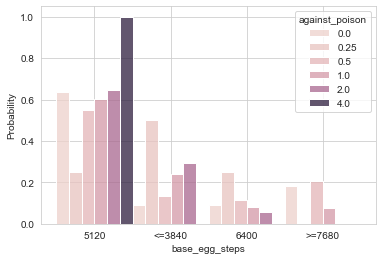

against_poison      0.00      0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                            
5120            0.044586  0.006369  0.184713  0.617834  0.140127  0.006369
6400            0.043478  0.043478  0.260870  0.565217  0.086957  0.000000
<=3840          0.016949  0.033898  0.118644  0.661017  0.169492  0.000000
>=7680          0.080000  0.000000  0.440000  0.480000  0.000000  0.000000




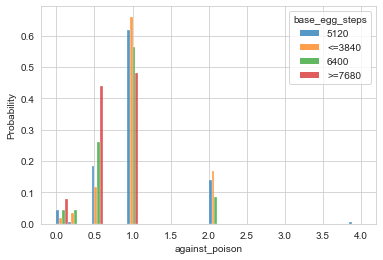

against_fighting  0.00  0.25  0.50  1.00  2.00  4.00
base_egg_steps                                      
5120                 4     4    39    76    32     2
6400                 6     1     4     9     3     0
<=3840               1     5    19    19    15     0
>=7680               1     0     1    11     9     3


against_fighting      0.00  0.25      0.50      1.00      2.00  4.00
base_egg_steps                                                      
5120              0.333333   0.4  0.619048  0.660870  0.542373   0.4
6400              0.500000   0.1  0.063492  0.078261  0.050847   0.0
<=3840            0.083333   0.5  0.301587  0.165217  0.254237   0.0
>=7680            0.083333   0.0  0.015873  0.095652  0.152542   0.6




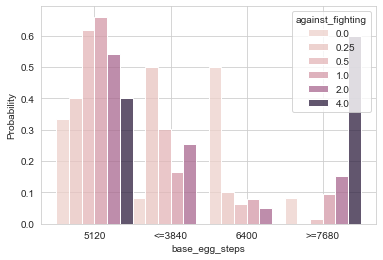

against_fighting      0.00      0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                              
5120              0.025478  0.025478  0.248408  0.484076  0.203822  0.012739
6400              0.260870  0.043478  0.173913  0.391304  0.130435  0.000000
<=3840            0.016949  0.084746  0.322034  0.322034  0.254237  0.000000
>=7680            0.040000  0.000000  0.040000  0.440000  0.360000  0.120000




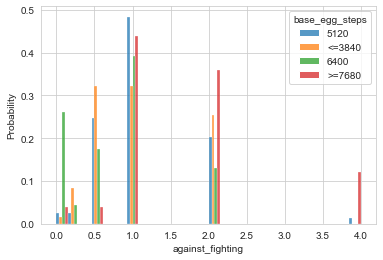

against_rock    0.5  1.0  2.0  4.0
base_egg_steps                    
5120             24  100   31    2
6400              5   13    5    0
<=3840            6   29   22    2
>=7680            4   15    5    1


against_rock         0.5       1.0       2.0  4.0
base_egg_steps                                   
5120            0.615385  0.636943  0.492063  0.4
6400            0.128205  0.082803  0.079365  0.0
<=3840          0.153846  0.184713  0.349206  0.4
>=7680          0.102564  0.095541  0.079365  0.2




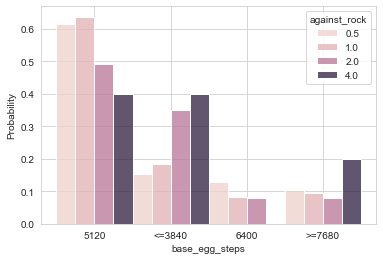

against_rock         0.5       1.0       2.0       4.0
base_egg_steps                                        
5120            0.152866  0.636943  0.197452  0.012739
6400            0.217391  0.565217  0.217391  0.000000
<=3840          0.101695  0.491525  0.372881  0.033898
>=7680          0.160000  0.600000  0.200000  0.040000




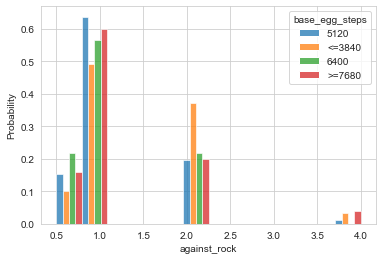

against_steel   0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               2    54    85    16     0
6400               0     3    15     4     1
<=3840             1    12    39     7     0
>=7680             0     5    14     5     1


against_steel       0.25      0.50      1.00     2.00  4.00
base_egg_steps                                             
5120            0.666667  0.729730  0.555556  0.50000   0.0
6400            0.000000  0.040541  0.098039  0.12500   0.5
<=3840          0.333333  0.162162  0.254902  0.21875   0.0
>=7680          0.000000  0.067568  0.091503  0.15625   0.5




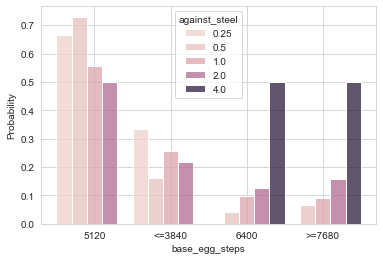

against_steel       0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.012739  0.343949  0.541401  0.101911  0.000000
6400            0.000000  0.130435  0.652174  0.173913  0.043478
<=3840          0.016949  0.203390  0.661017  0.118644  0.000000
>=7680          0.000000  0.200000  0.560000  0.200000  0.040000




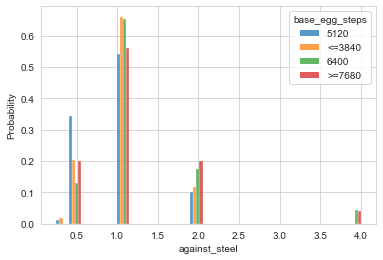

against_fairy   0.25  0.50  1.00  2.00  4.00
base_egg_steps                              
5120               1    35   106    15     0
6400               0     2    15     6     0
<=3840             0     5    51     2     1
>=7680             0     3    17     5     0


against_fairy   0.25      0.50      1.00      2.00  4.00
base_egg_steps                                          
5120             1.0  0.777778  0.560847  0.535714   0.0
6400             0.0  0.044444  0.079365  0.214286   0.0
<=3840           0.0  0.111111  0.269841  0.071429   1.0
>=7680           0.0  0.066667  0.089947  0.178571   0.0




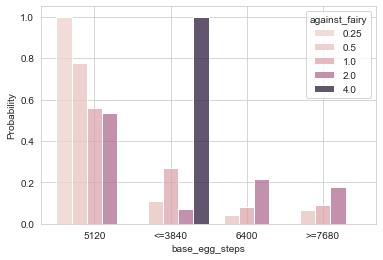

against_fairy       0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                  
5120            0.006369  0.222930  0.675159  0.095541  0.000000
6400            0.000000  0.086957  0.652174  0.260870  0.000000
<=3840          0.000000  0.084746  0.864407  0.033898  0.016949
>=7680          0.000000  0.120000  0.680000  0.200000  0.000000




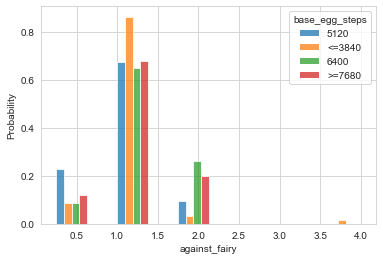

against_dark    0.25  0.50  1.00  2.00
base_egg_steps                        
5120               0    22   117    18
6400               0     7     7     9
<=3840             1     8    47     3
>=7680             0     0    24     1


against_dark    0.25      0.50      1.00      2.00
base_egg_steps                                    
5120             0.0  0.594595  0.600000  0.580645
6400             0.0  0.189189  0.035897  0.290323
<=3840           1.0  0.216216  0.241026  0.096774
>=7680           0.0  0.000000  0.123077  0.032258




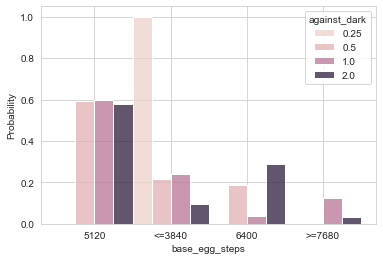

against_dark        0.25      0.50      1.00      2.00
base_egg_steps                                        
5120            0.000000  0.140127  0.745223  0.114650
6400            0.000000  0.304348  0.304348  0.391304
<=3840          0.016949  0.135593  0.796610  0.050847
>=7680          0.000000  0.000000  0.960000  0.040000




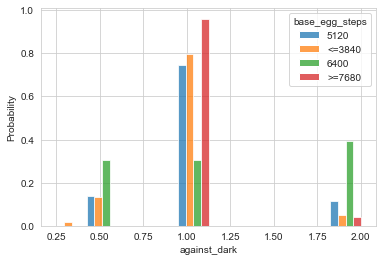

against_ghost   0.0  0.5  1.0  2.0
base_egg_steps                    
5120             23    7  109   18
6400              0    2   11   10
<=3840           17    2   37    3
>=7680            2    0   22    1


against_ghost        0.0       0.5       1.0      2.0
base_egg_steps                                       
5120            0.547619  0.636364  0.608939  0.56250
6400            0.000000  0.181818  0.061453  0.31250
<=3840          0.404762  0.181818  0.206704  0.09375
>=7680          0.047619  0.000000  0.122905  0.03125




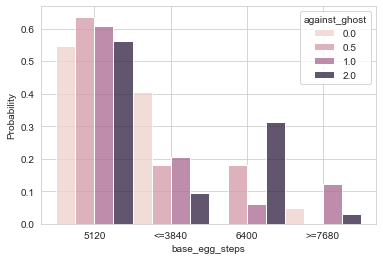

against_ghost        0.0       0.5       1.0       2.0
base_egg_steps                                        
5120            0.146497  0.044586  0.694268  0.114650
6400            0.000000  0.086957  0.478261  0.434783
<=3840          0.288136  0.033898  0.627119  0.050847
>=7680          0.080000  0.000000  0.880000  0.040000




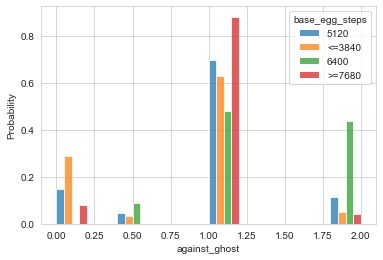

against_dragon  0.0  0.5  1.0  2.0
base_egg_steps                    
5120              9    6  140    2
6400              2    1   20    0
<=3840            5    1   53    0
>=7680            0    2   18    5


against_dragon     0.0  0.5       1.0       2.0
base_egg_steps                                 
5120            0.5625  0.6  0.606061  0.285714
6400            0.1250  0.1  0.086580  0.000000
<=3840          0.3125  0.1  0.229437  0.000000
>=7680          0.0000  0.2  0.077922  0.714286




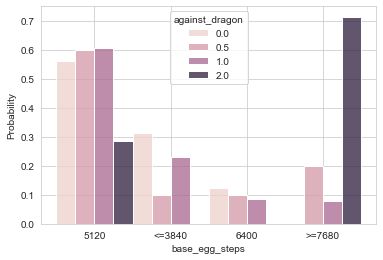

against_dragon       0.0       0.5       1.0       2.0
base_egg_steps                                        
5120            0.057325  0.038217  0.891720  0.012739
6400            0.086957  0.043478  0.869565  0.000000
<=3840          0.084746  0.016949  0.898305  0.000000
>=7680          0.000000  0.080000  0.720000  0.200000




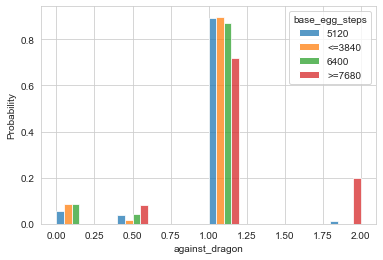

against_psychic  0.00  0.25  0.50  1.00  2.00  4.00
base_egg_steps                                     
5120                8     1    19   105    24     0
6400                2     0     5    12     4     0
<=3840              2     0     3    49     4     1
>=7680              0     0     2    23     0     0


against_psychic      0.00  0.25      0.50      1.00   2.00  4.00
base_egg_steps                                                  
5120             0.666667   1.0  0.655172  0.555556  0.750   0.0
6400             0.166667   0.0  0.172414  0.063492  0.125   0.0
<=3840           0.166667   0.0  0.103448  0.259259  0.125   1.0
>=7680           0.000000   0.0  0.068966  0.121693  0.000   0.0




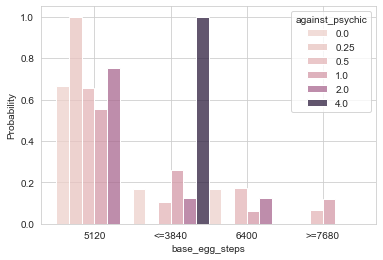

against_psychic      0.00      0.25      0.50      1.00      2.00      4.00
base_egg_steps                                                             
5120             0.050955  0.006369  0.121019  0.668790  0.152866  0.000000
6400             0.086957  0.000000  0.217391  0.521739  0.173913  0.000000
<=3840           0.033898  0.000000  0.050847  0.830508  0.067797  0.016949
>=7680           0.000000  0.000000  0.080000  0.920000  0.000000  0.000000




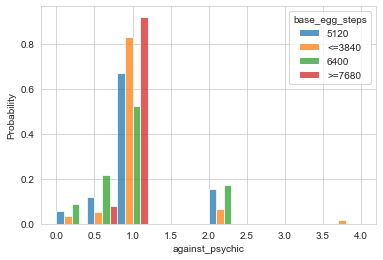

In [32]:
for feature in against_features:
    compare_categorical(feature)

### STEP 4: Barplots showing relationships between Response and is_?_type features

#### Below are only the barplots that do show some sort of noticeable trend :

for bug type :

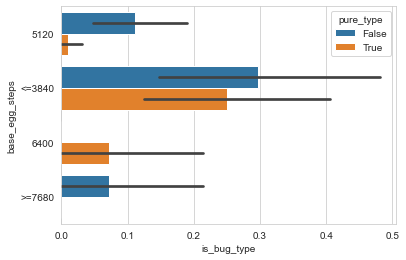

is_bug_type     False  True 
base_egg_steps              
5120              149      8
6400               22      1
<=3840             43     16
>=7680             24      1


is_bug_type        False     True 
base_egg_steps                    
5120            0.626050  0.307692
6400            0.092437  0.038462
<=3840          0.180672  0.615385
>=7680          0.100840  0.038462




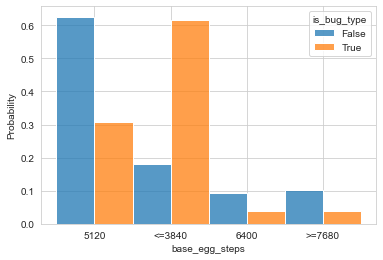

is_bug_type        False     True 
base_egg_steps                    
5120            0.949045  0.050955
6400            0.956522  0.043478
<=3840          0.728814  0.271186
>=7680          0.960000  0.040000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


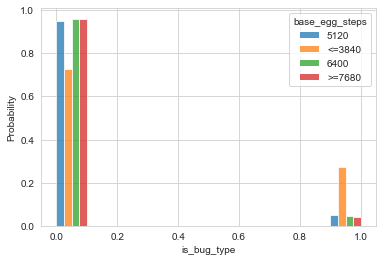

In [34]:
sns.barplot(x = "is_bug_type", y = "base_egg_steps", hue = "pure_type", data = df)
plt.show()

compare_categorical("is_bug_type")

for fairy type :

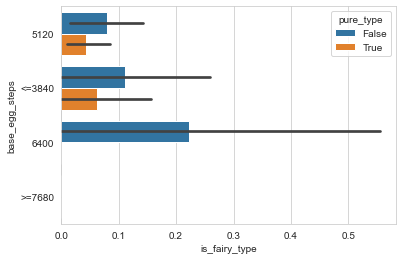

is_fairy_type   False  True 
base_egg_steps              
5120              148      9
6400               21      2
<=3840             54      5
>=7680             25      0


is_fairy_type      False   True 
base_egg_steps                  
5120            0.596774  0.5625
6400            0.084677  0.1250
<=3840          0.217742  0.3125
>=7680          0.100806  0.0000




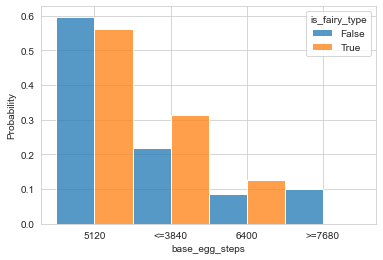

is_fairy_type      False     True 
base_egg_steps                    
5120            0.942675  0.057325
6400            0.913043  0.086957
<=3840          0.915254  0.084746
>=7680          1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


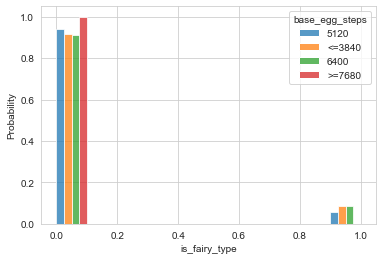

In [35]:
sns.barplot(x = "is_fairy_type", y = "base_egg_steps", hue = "pure_type", data = df)
plt.show()

compare_categorical("is_fairy_type")

for dragon type :

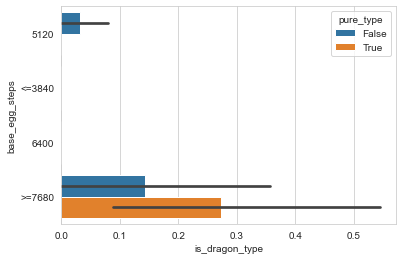

is_dragon_type  False  True 
base_egg_steps              
5120              155      2
6400               23      0
<=3840             59      0
>=7680             20      5


is_dragon_type     False     True 
base_egg_steps                    
5120            0.603113  0.285714
6400            0.089494  0.000000
<=3840          0.229572  0.000000
>=7680          0.077821  0.714286




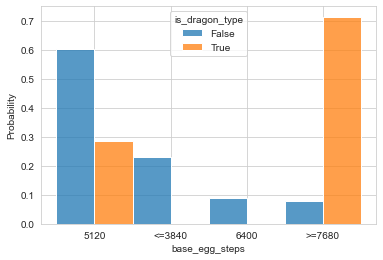

is_dragon_type     False     True 
base_egg_steps                    
5120            0.987261  0.012739
6400            1.000000  0.000000
<=3840          1.000000  0.000000
>=7680          0.800000  0.200000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


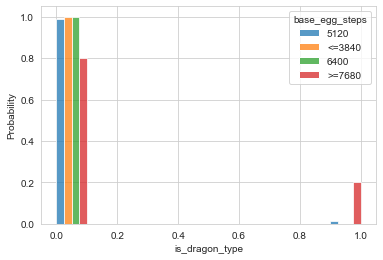

In [37]:
sns.barplot(x = "is_dragon_type", y = "base_egg_steps", hue = "pure_type", data = df)
plt.show()

compare_categorical("is_dragon_type")

for ALL the other types:

In [38]:
is_type_features = []
for pokemon_type in ALL_TYPES:
    is_type_features.append('is_' + pokemon_type + '_type')

is_fire_type    False  True 
base_egg_steps              
5120              142     15
6400               22      1
<=3840             58      1
>=7680             24      1


is_fire_type       False     True 
base_egg_steps                    
5120            0.577236  0.833333
6400            0.089431  0.055556
<=3840          0.235772  0.055556
>=7680          0.097561  0.055556




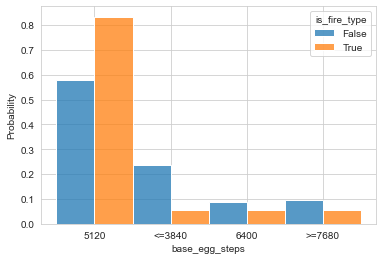

is_fire_type       False     True 
base_egg_steps                    
5120            0.904459  0.095541
6400            0.956522  0.043478
<=3840          0.983051  0.016949
>=7680          0.960000  0.040000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


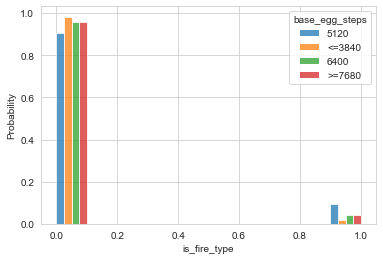

is_water_type   False  True 
base_egg_steps              
5120              130     27
6400               22      1
<=3840             49     10
>=7680             17      8


is_water_type      False     True 
base_egg_steps                    
5120            0.596330  0.586957
6400            0.100917  0.021739
<=3840          0.224771  0.217391
>=7680          0.077982  0.173913




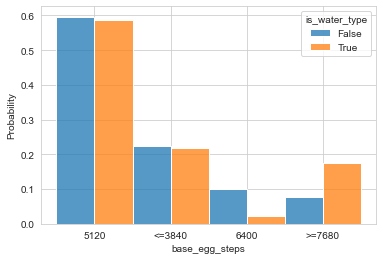

is_water_type      False     True 
base_egg_steps                    
5120            0.828025  0.171975
6400            0.956522  0.043478
<=3840          0.830508  0.169492
>=7680          0.680000  0.320000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


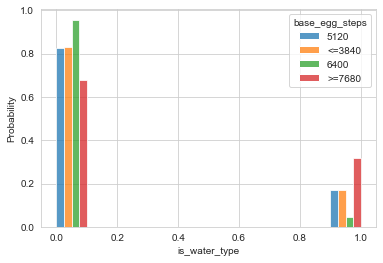

is_grass_type   False  True 
base_egg_steps              
5120              132     25
6400               21      2
<=3840             54      5
>=7680             24      1


is_grass_type      False     True 
base_egg_steps                    
5120            0.571429  0.757576
6400            0.090909  0.060606
<=3840          0.233766  0.151515
>=7680          0.103896  0.030303




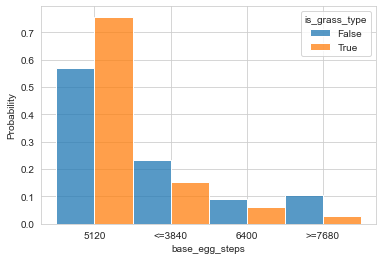

is_grass_type      False     True 
base_egg_steps                    
5120            0.840764  0.159236
6400            0.913043  0.086957
<=3840          0.915254  0.084746
>=7680          0.960000  0.040000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


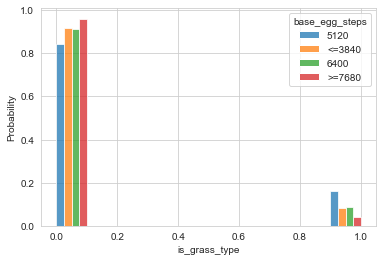

is_electric_type  False  True 
base_egg_steps                
5120                144     13
6400                 23      0
<=3840               56      3
>=7680               25      0


is_electric_type     False   True 
base_egg_steps                    
5120              0.580645  0.8125
6400              0.092742  0.0000
<=3840            0.225806  0.1875
>=7680            0.100806  0.0000




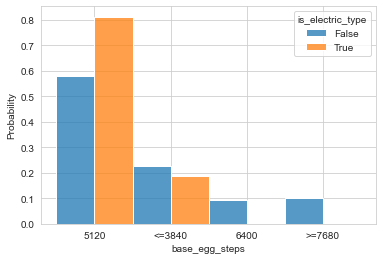

is_electric_type     False     True 
base_egg_steps                      
5120              0.917197  0.082803
6400              1.000000  0.000000
<=3840            0.949153  0.050847
>=7680            1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


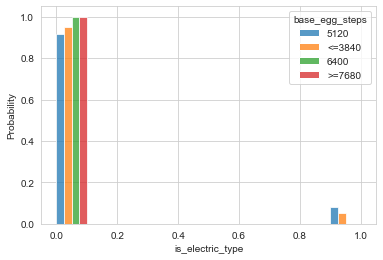

is_ground_type  False  True 
base_egg_steps              
5120              146     11
6400               22      1
<=3840             56      3
>=7680             23      2


is_ground_type     False     True 
base_egg_steps                    
5120            0.591093  0.647059
6400            0.089069  0.058824
<=3840          0.226721  0.176471
>=7680          0.093117  0.117647




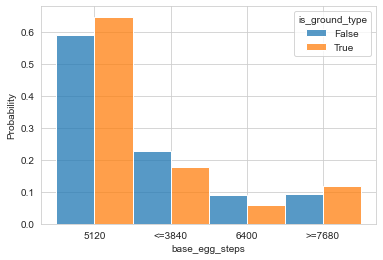

is_ground_type     False     True 
base_egg_steps                    
5120            0.929936  0.070064
6400            0.956522  0.043478
<=3840          0.949153  0.050847
>=7680          0.920000  0.080000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


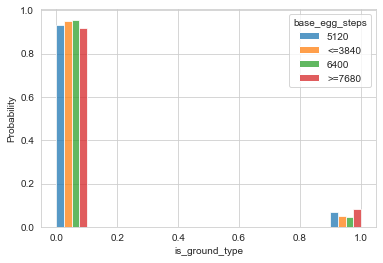

is_bug_type     False  True 
base_egg_steps              
5120              149      8
6400               22      1
<=3840             43     16
>=7680             24      1


is_bug_type        False     True 
base_egg_steps                    
5120            0.626050  0.307692
6400            0.092437  0.038462
<=3840          0.180672  0.615385
>=7680          0.100840  0.038462




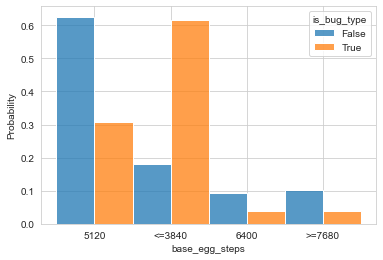

is_bug_type        False     True 
base_egg_steps                    
5120            0.949045  0.050955
6400            0.956522  0.043478
<=3840          0.728814  0.271186
>=7680          0.960000  0.040000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


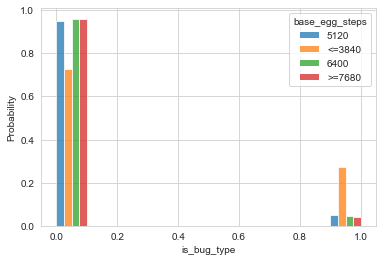

is_normal_type  False  True 
base_egg_steps              
5120              134     23
6400               23      0
<=3840             42     17
>=7680             23      2


is_normal_type     False     True 
base_egg_steps                    
5120            0.603604  0.547619
6400            0.103604  0.000000
<=3840          0.189189  0.404762
>=7680          0.103604  0.047619




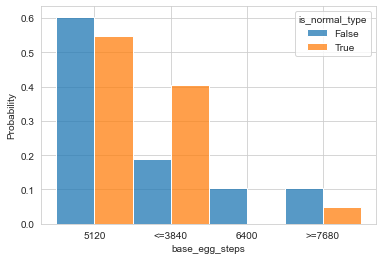

is_normal_type     False     True 
base_egg_steps                    
5120            0.853503  0.146497
6400            1.000000  0.000000
<=3840          0.711864  0.288136
>=7680          0.920000  0.080000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


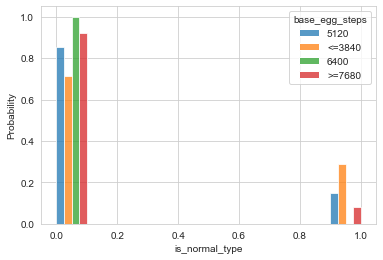

is_ice_type     False  True 
base_egg_steps              
5120              150      7
6400               22      1
<=3840             59      0
>=7680             23      2


is_ice_type        False  True 
base_egg_steps                 
5120            0.590551    0.7
6400            0.086614    0.1
<=3840          0.232283    0.0
>=7680          0.090551    0.2




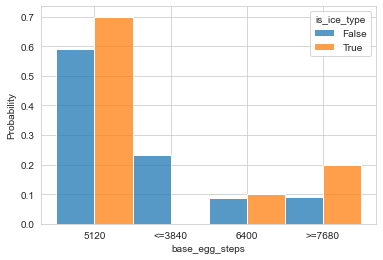

is_ice_type        False     True 
base_egg_steps                    
5120            0.955414  0.044586
6400            0.956522  0.043478
<=3840          1.000000  0.000000
>=7680          0.920000  0.080000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


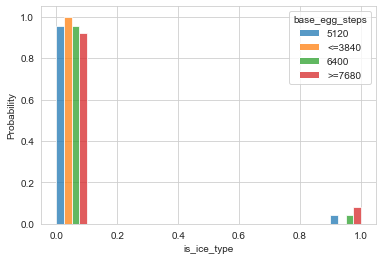

is_flying_type  False  True 
base_egg_steps              
5120              148      9
6400               20      3
<=3840             49     10
>=7680             22      3


is_flying_type     False  True 
base_egg_steps                 
5120            0.619247   0.36
6400            0.083682   0.12
<=3840          0.205021   0.40
>=7680          0.092050   0.12




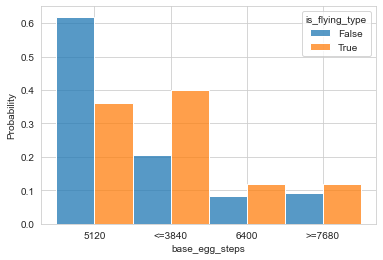

is_flying_type     False     True 
base_egg_steps                    
5120            0.942675  0.057325
6400            0.869565  0.130435
<=3840          0.830508  0.169492
>=7680          0.880000  0.120000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


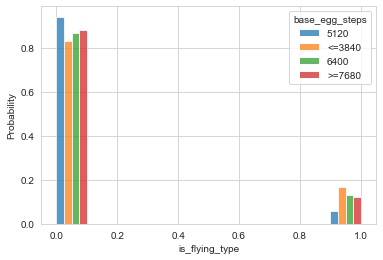

is_poison_type  False  True 
base_egg_steps              
5120              139     18
6400               23      0
<=3840             55      4
>=7680             25      0


is_poison_type     False     True 
base_egg_steps                    
5120            0.574380  0.818182
6400            0.095041  0.000000
<=3840          0.227273  0.181818
>=7680          0.103306  0.000000




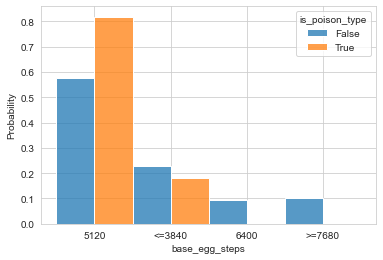

is_poison_type     False     True 
base_egg_steps                    
5120            0.885350  0.114650
6400            1.000000  0.000000
<=3840          0.932203  0.067797
>=7680          1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


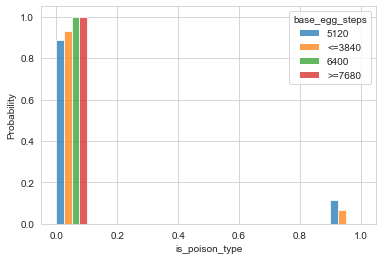

is_fighting_type  False  True 
base_egg_steps                
5120                149      8
6400                 19      4
<=3840               56      3
>=7680               25      0


is_fighting_type     False     True 
base_egg_steps                      
5120              0.598394  0.533333
6400              0.076305  0.266667
<=3840            0.224900  0.200000
>=7680            0.100402  0.000000




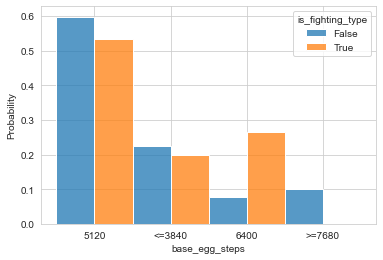

is_fighting_type     False     True 
base_egg_steps                      
5120              0.949045  0.050955
6400              0.826087  0.173913
<=3840            0.949153  0.050847
>=7680            1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


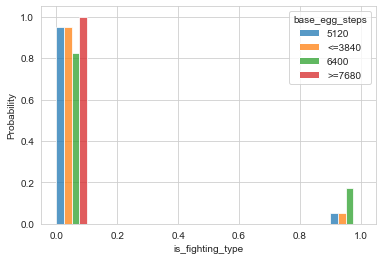

is_rock_type    False  True 
base_egg_steps              
5120              151      6
6400               20      3
<=3840             56      3
>=7680             14     11


is_rock_type       False     True 
base_egg_steps                    
5120            0.626556  0.260870
6400            0.082988  0.130435
<=3840          0.232365  0.130435
>=7680          0.058091  0.478261




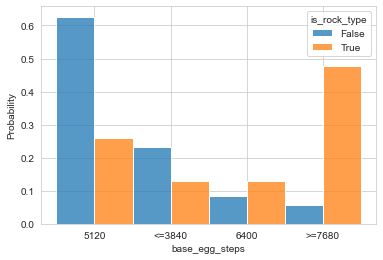

is_rock_type       False     True 
base_egg_steps                    
5120            0.961783  0.038217
6400            0.869565  0.130435
<=3840          0.949153  0.050847
>=7680          0.560000  0.440000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


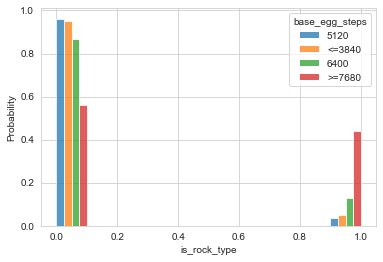

is_steel_type   False  True 
base_egg_steps              
5120              150      7
6400               22      1
<=3840             58      1
>=7680             23      2


is_steel_type      False     True 
base_egg_steps                    
5120            0.592885  0.636364
6400            0.086957  0.090909
<=3840          0.229249  0.090909
>=7680          0.090909  0.181818




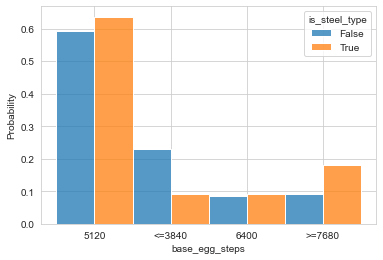

is_steel_type      False     True 
base_egg_steps                    
5120            0.955414  0.044586
6400            0.956522  0.043478
<=3840          0.983051  0.016949
>=7680          0.920000  0.080000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


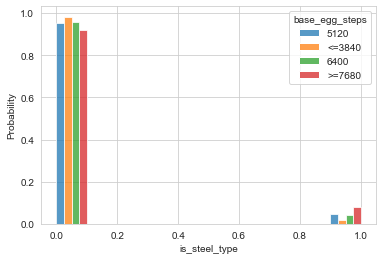

is_fairy_type   False  True 
base_egg_steps              
5120              148      9
6400               21      2
<=3840             54      5
>=7680             25      0


is_fairy_type      False   True 
base_egg_steps                  
5120            0.596774  0.5625
6400            0.084677  0.1250
<=3840          0.217742  0.3125
>=7680          0.100806  0.0000




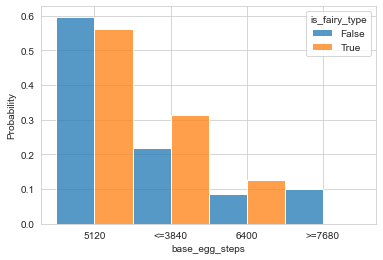

is_fairy_type      False     True 
base_egg_steps                    
5120            0.942675  0.057325
6400            0.913043  0.086957
<=3840          0.915254  0.084746
>=7680          1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


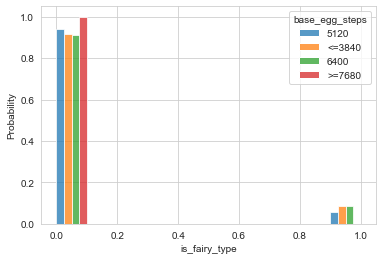

is_dark_type    False  True 
base_egg_steps              
5120              148      9
6400               21      2
<=3840             57      2
>=7680             25      0


is_dark_type       False     True 
base_egg_steps                    
5120            0.589641  0.692308
6400            0.083665  0.153846
<=3840          0.227092  0.153846
>=7680          0.099602  0.000000




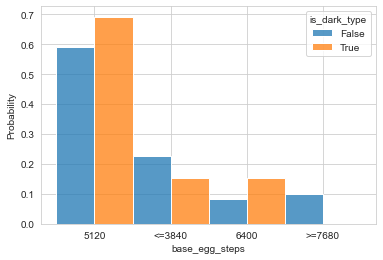

is_dark_type       False     True 
base_egg_steps                    
5120            0.942675  0.057325
6400            0.913043  0.086957
<=3840          0.966102  0.033898
>=7680          1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


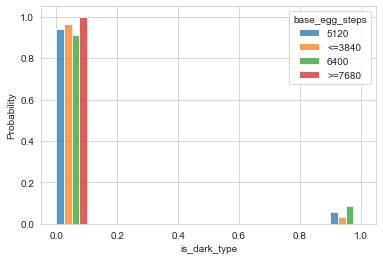

is_ghost_type   False  True 
base_egg_steps              
5120              153      4
6400               17      6
<=3840             58      1
>=7680             24      1


is_ghost_type      False     True 
base_egg_steps                    
5120            0.607143  0.333333
6400            0.067460  0.500000
<=3840          0.230159  0.083333
>=7680          0.095238  0.083333




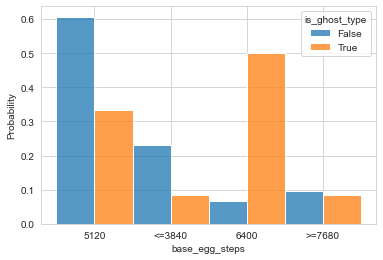

is_ghost_type      False     True 
base_egg_steps                    
5120            0.974522  0.025478
6400            0.739130  0.260870
<=3840          0.983051  0.016949
>=7680          0.960000  0.040000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


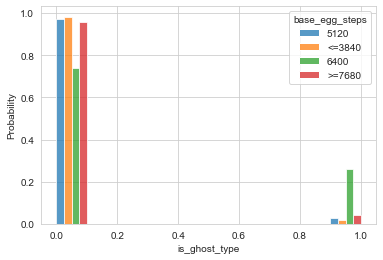

is_dragon_type  False  True 
base_egg_steps              
5120              155      2
6400               23      0
<=3840             59      0
>=7680             20      5


is_dragon_type     False     True 
base_egg_steps                    
5120            0.603113  0.285714
6400            0.089494  0.000000
<=3840          0.229572  0.000000
>=7680          0.077821  0.714286




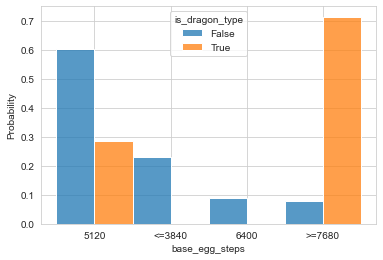

is_dragon_type     False     True 
base_egg_steps                    
5120            0.987261  0.012739
6400            1.000000  0.000000
<=3840          1.000000  0.000000
>=7680          0.800000  0.200000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


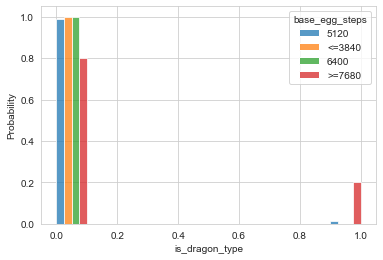

is_psychic_type  False  True 
base_egg_steps               
5120               140     17
6400                19      4
<=3840              57      2
>=7680              25      0


is_psychic_type     False     True 
base_egg_steps                     
5120             0.580913  0.739130
6400             0.078838  0.173913
<=3840           0.236515  0.086957
>=7680           0.103734  0.000000




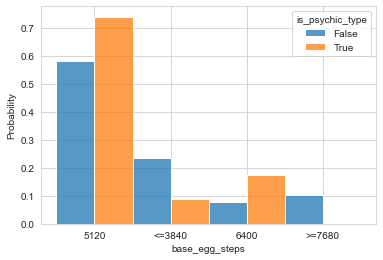

is_psychic_type     False     True 
base_egg_steps                     
5120             0.891720  0.108280
6400             0.826087  0.173913
<=3840           0.966102  0.033898
>=7680           1.000000  0.000000




<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


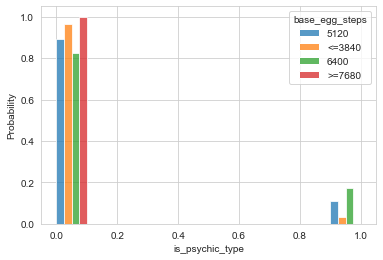

In [39]:
for feature in is_type_features:
    compare_categorical(feature)

### SHORT CONCLUSIONS
Size and strength (e.g. weight_kg, base_total, and attack variables which display good potential discriminating abilities) could be positively related with egg steps, which makes sense in the sense that stronger Pokémon could take longer to hatch. <br>
capture_rate also seems to have a clear negative relationship with egg steps - the lower the rate of capture of a Pokemon species, the harder this species is to catch and to obtain in general, thus it would make sense that these harder-to-catch Pokemon also take longer to hatch.